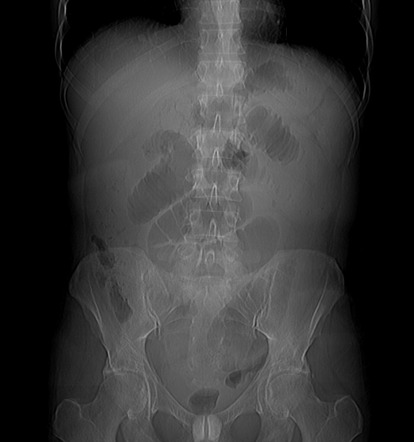

In [6]:
import numpy as np
import scipy.misc, math
from scipy.misc.pilutil import Image
# opening the image and converting it to grayscale
img = Image.open('data/ct-scout.jpeg').convert('L')
img

In [2]:
# img is converted to an ndarray
img1 = scipy.misc.fromimage(img)
# 2D array is convereted to an 1D
fl = img1.flatten()
# histogram and the bins of the image are computed
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed
cdf = hist.cumsum()
# places where cdf=0 is masked or ignored and
# rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf,0)
# histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m

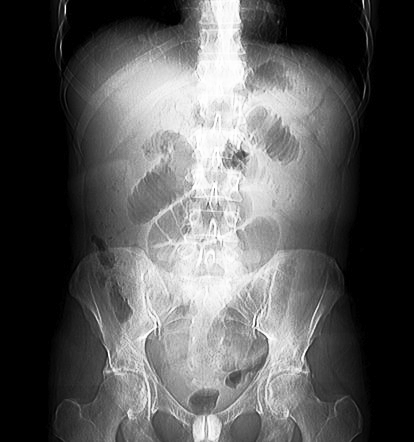

In [4]:
# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array
im2 = cdf[fl]
# im2 is 1D so we use reshape command to
# make it into 2D
im3 = np.reshape(im2,img1.shape)
# converting im3 to an image
im4 = scipy.misc.toimage(im3)
# saving im4 as hequalization_output.png
# in Figures folder
#im4.save('../Figures/hequalization_output.png')
im4

In [5]:
im4.show()